In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, places,geo_tools, bloomdrivers as bd, evaltools as et
import xarray as xr
import datetime as dt
%matplotlib inline

Load watermasks for pre- and post-September 2011 HRDPS grid

In [2]:
Watermask1 = xr.open_dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/GEM_watermask_for_gem_files_pre_22sep11.nc')
Watermask2 = xr.open_dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/GEM_watermask_for_gem_files_22sep11_onward.nc')

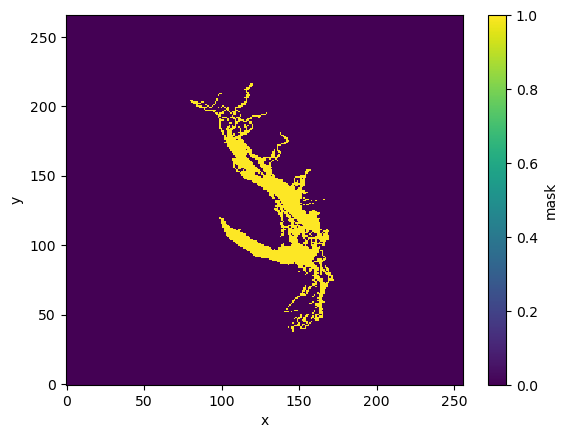

In [3]:
Watermask1.mask.plot() # Check that the mask works

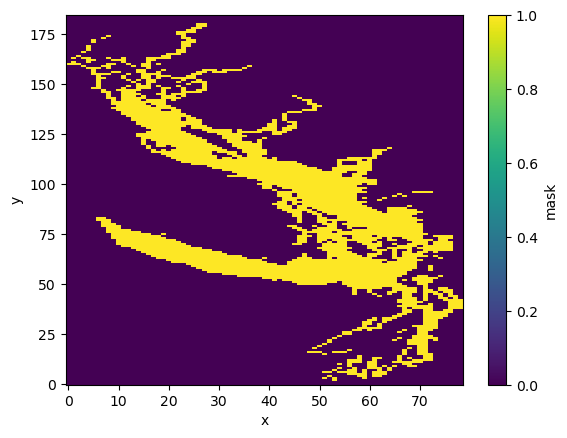

In [13]:
Watermask2.mask[40:225,96:175].plot() # Check that watermask2 works

Get grid corners for Strait of Georgia (use 2015, pre Sept 22, 2011 and post Sept 22 2011 files)

<class 'netCDF4._netCDF4.Variable'>
float32 u_wind(time_counter, y, x)
    _FillValue: nan
    level: 10 m above surface
    long_name: U-Component of Wind
    standard_name: x_wind
    units: m/s
    ioos_category: wind speed and direction
unlimited dimensions: time_counter
current shape = (24, 266, 256)
filling on


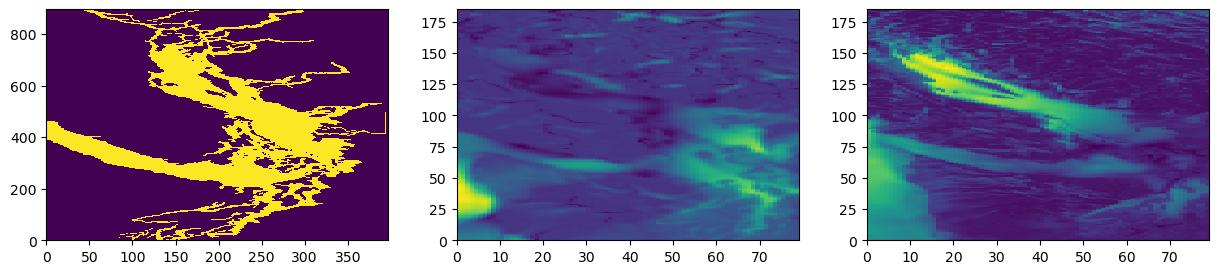

In [14]:
## because grids changed September 22, 2011
#jm1, jm2, im1, im2 = (400, 800, 110, 350) # Karyn box
#j1, j2, i1, i2 = (119, 213, 96, 163)    # Karyn box

jm1, jm2, im1, im2 = (1, 898, 1, 398) # test
j1, j2, i1, i2 = (40, 225, 96, 175)    # test

fig,ax=plt.subplots(1,3,figsize=(15,3))
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as mesh:
    navlon=mesh.variables['nav_lon'][:,:]
    navlat=mesh.variables['nav_lat'][:,:]
    tmask=mesh.variables['tmask'][0,:,:,:]
    ax[0].pcolormesh(mesh.variables['tmask'][0,0,jm1:jm2,im1:im2])
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/operational/ops_y2015m03d01.nc') as g:
    ops_lon=g.variables['nav_lon'][:,:]
    ops_lat=g.variables['nav_lat'][:,:]
    ax[1].pcolormesh((g.variables['u_wind'][0,j1:j2,i1:i2]**2+\
                      g.variables['v_wind'][0,j1:j2,i1:i2]**2)**(1/2))
    #.pcolormesh(g.variables[])
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2011m09d21.nc') as g: 
    gl1_lon=g.variables['nav_lon'][:,:]
    gl1_lat=g.variables['nav_lat'][:,:]
    ax[2].pcolormesh((g.variables['u_wind'][0,j1:j2,i1:i2]**2+\
                      g.variables['v_wind'][0,j1:j2,i1:i2]**2)**(1/2))
with nc.Dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2011m09d22.nc') as g: 
    gl2_lon=g.variables['nav_lon'][:,:]
    gl2_lat=g.variables['nav_lat'][:,:]
    ax[2].pcolormesh((g.variables['u_wind'][0,j1:j2,i1:i2]**2+\
                      g.variables['v_wind'][0,j1:j2,i1:i2]**2)**(1/2))
    print(g.variables['u_wind'])

In [15]:
ll_lon=navlon[1,90]
lr_lon=navlon[1,350]
ul_lon=navlon[800,1]
ur_lon=navlon[800,90]
ll_lat=navlat[1,90]
lr_lat=navlat[1,350]
ul_lat=navlat[800,90]
ur_lat=navlat[800,350]

Find the closest ji model points for each of the grids (ops, gl1, gl2)

In [16]:
(ll_j_ops,ll_i_ops)=geo_tools.find_closest_model_point(ll_lon,ll_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(lr_j_ops,lr_i_ops)=geo_tools.find_closest_model_point(lr_lon,lr_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(ul_j_ops,ul_i_ops)=geo_tools.find_closest_model_point(ul_lon,ul_lat,ops_lon-360,ops_lat,grid='GEM2.5')
(ur_j_ops,ur_i_ops)=geo_tools.find_closest_model_point(ur_lon,ur_lat,ops_lon-360,ops_lat,grid='GEM2.5')
print((ll_j_ops,ll_i_ops),(lr_j_ops,lr_i_ops),(ul_j_ops,ul_i_ops),(ur_j_ops,ur_i_ops))

(37, 145) (52, 193) (202, 79) (221, 97)


In [17]:
(ll_j_gl1,ll_i_gl1)=geo_tools.find_closest_model_point(ll_lon,ll_lat,gl1_lon-360,gl1_lat,grid='GEM2.5')
(lr_j_gl1,lr_i_gl1)=geo_tools.find_closest_model_point(lr_lon,lr_lat,gl1_lon-360,gl2_lat,grid='GEM2.5')
(ul_j_gl1,ul_i_gl1)=geo_tools.find_closest_model_point(ul_lon,ul_lat,gl1_lon-360,gl1_lat,grid='GEM2.5')
(ur_j_gl1,ur_i_gl1)=geo_tools.find_closest_model_point(ur_lon,ur_lat,gl1_lon-360,gl1_lat,grid='GEM2.5')
print((ll_j_gl1,ll_i_gl1),(lr_j_gl1,lr_i_gl1),(ul_j_gl1,ul_i_gl1),(ur_j_gl1,ur_i_gl1))

(37, 144) (56, 189) (191, 79) (209, 96)


In [18]:
(ll_j_gl2,ll_i_gl2)=geo_tools.find_closest_model_point(ll_lon,ll_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(lr_j_gl2,lr_i_gl2)=geo_tools.find_closest_model_point(lr_lon,lr_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(ul_j_gl2,ul_i_gl2)=geo_tools.find_closest_model_point(ul_lon,ul_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
(ur_j_gl2,ur_i_gl2)=geo_tools.find_closest_model_point(ur_lon,ur_lat,gl2_lon-360,gl2_lat,grid='GEM2.5')
print((ll_j_gl2,ll_i_gl2),(lr_j_gl2,lr_i_gl2),(ul_j_gl2,ul_i_gl2),(ur_j_gl2,ur_i_gl2))

(40, 147) (56, 192) (194, 82) (212, 99)


In [ ]:
# ops: use j: ll_j_ops:ur_j_ops, i: ul_i_ops:lr_i_ops
# gl1: use j: ll_j_gl1:ur_j_gl1, i: ul_i_gl1:lr_i_gl1
# gl2: use j: ll_j_gl2:ur_j_gl2, i: ul_i_gl2:lr_i_gl2

Get Wind Variables

In [19]:
def getWindVars(day):
    if day>dt.datetime(2014,12,1): #or day.year>2014
        opsdir='/results/forcing/atmospheric/GEM2.5/operational/'
        nam_fmt='ops'
        jlims=(ll_j_ops,ur_j_ops)
        ilims=(ul_i_ops,lr_i_ops)
    elif day<dt.datetime(2011,9,22):
        opsdir='/results/forcing/atmospheric/GEM2.5/gemlam'
        nam_fmt='gemlam'
        jlims=(ll_j_gl1,ur_j_gl1)
        ilims=(ul_i_gl1,lr_i_gl1)
    else:
        opsdir='/results/forcing/atmospheric/GEM2.5/gemlam'
        nam_fmt='gemlam'
        jlims=(ll_j_gl2,ur_j_gl2)
        ilims=(ul_i_gl2,lr_i_gl2)
    return opsdir, nam_fmt, jlims, ilims

In [26]:
year = [2008, 2009]
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
sday = 1
m30 = [4, 6, 9, 11]
#eday = 31
if month == m30:
    eday = 30
elif month == 2:
    eday = 28
else:
    eday = 31



In [ ]:
year = [2008, 2009]
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
sday = 1
m30 = [4, 6, 9, 11]
#eday = 31
if month == m30:
    eday = 30
elif month == 2:
    eday = 28
else:
    eday = 31

for day in day:
day=dt.datetime(year,month,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(year,month,sday),dt.datetime(year,month,eday),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2008=xr.concat([ii['u_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2008=xr.concat([ii['v_wind'].where(Watermask1.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2008=(fujan2008**2+fvjan2008**2)**(1/2)
jan_ws2008mean=np.mean(jan_ws2008,0)

In [50]:
startyear=2015
endyear = 2020
day=dt.datetime(startyear,1,1)
opsdir, namfmt, jlims, ilims = getWindVars(day)
flist=et.index_model_files(dt.datetime(startyear,1,1),dt.datetime(endyear,12,31),opsdir,namfmt,
                           flen=1,ftype='None',tres=24);
fs=[xr.open_dataset(ii,chunks='auto') for ii in flist['paths']]
fujan2015=xr.concat([ii['u_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
fvjan2015=xr.concat([ii['v_wind'].where(Watermask2.mask).isel(x=slice(ilims[0],ilims[1]),y=slice(jlims[0],jlims[1])) for ii in fs],"time_counter")
jan_ws2015=(fujan2015**2+fvjan2015**2)**(1/2)
jan_ws2015mean=np.mean(jan_ws2015,0)

KeyboardInterrupt: 

In [48]:
print(jan_ws2015.shape,jan_ws2015mean.shape)

(17520, 172, 110) (172, 110)


In [45]:
jan2 = jan_ws2015.reshape(2,8760, 184, 114)
jan2.shape

AttributeError: 'DataArray' object has no attribute 'reshape'

In [33]:
import arrow
# Constant and data rang
syear = 2007
eyear = 2007
smonth = 1
emonth = 12
startdate = arrow.get(syear, smonth, 1)
enddate = arrow.get(eyear, emonth, 31)

In [34]:
for ii, day in enumerate(arrow.Arrow.range('day', startdate, enddate)):
    year = day.year
    yr2 = day.strftime("%y")
    month = day.month
    Month = day.strftime("%b").lower()
    day = day.day
    

In [36]:
print(day,month, Month,year, yr2)

31 12 dec 2007 07
